# Finance Data Project 

This project is about exploratory data analysis of stock prices.
Main focus is on bank stocks and understanding how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [178]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

# Plotly imports
import plotly
import cufflinks as cf
cf.go_offline()

## Getting Data

Directly reading data from Google finance using pandas with the help of Pandas datareader. 
Stock data from Jan 1st 2006 to Jan 1st 2016 for each of below bank is collected.
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [108]:
startDate = datetime.datetime(2006,1,1)
endDate = datetime.datetime(2016, 1,1)

def loadFinanceData(fInstitute):
    return data.DataReader(fInstitute, 'google',startDate,endDate)

# Bank of America
BAC = loadFinanceData('BAC')

# CitiGroup
C = loadFinanceData('C')

# Goldman Sachs
GS = loadFinanceData('GS')

# JPMorgan Chase
JPM = loadFinanceData('JPM')

# Morgan Stanley
MS = loadFinanceData('MS')

# Wells Fargo
WFC = loadFinanceData('WFC')

In [109]:
BAC.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,33.40,33.58,32.82,33.50,3796200
2006-01-04,33.55,33.83,33.37,33.59,3001300


** Creating a list of the ticker symbols (as strings) in alphabetical order.**

In [98]:
tickers='BAC C GS JPM MS WFC'.split()

** Concatenating the bank dataframes together to a single data frame called stocks. tickers are set as keys.**

In [99]:
stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
stocks.head(2)

BAC                                    C                       \
             Open   High    Low  Close   Volume   Open   High    Low  Close   
Date                                                                          
2006-01-03  33.40  33.58  32.82  33.50  3796200  490.0  493.8  481.1  492.9   
2006-01-04  33.55  33.83  33.37  33.59  3001300  488.6  491.0  483.5  483.8   

                       ...        MS                                 WFC  \
             Volume    ...      Open   High    Low  Close   Volume  Open   
Date                   ...                                                 
2006-01-03  1537660    ...     57.17  58.49  56.74  58.31  5377000  31.6   
2006-01-04  1871020    ...     58.70  59.28  58.35  58.35  7977800  31.8   

                                           
             High    Low  Close    Volume  
Date                                       
2006-01-03  31.98  31.20  31.90  11016400  
2006-01-04  31.82  31.36  31.53  10871000  

[2 rows x 30 columns]

** Setting column name levels.**

In [100]:
stocks.columns.names = ['Bank Ticker','Stock Info']
stocks.head(2)

Bank Ticker    BAC                                    C                       \
Stock Info    Open   High    Low  Close   Volume   Open   High    Low  Close   
Date                                                                           
2006-01-03   33.40  33.58  32.82  33.50  3796200  490.0  493.8  481.1  492.9   
2006-01-04   33.55  33.83  33.37  33.59  3001300  488.6  491.0  483.5  483.8   

Bank Ticker             ...        MS                                 WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume  Open   
Date                    ...                                                 
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.6   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.8   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  

[2 rows x 30 columns]

# EDA

** Finding max Close price for each bank's stock throughout the time period.**

In [101]:
stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     60.93
C      564.10
GS     247.92
JPM     99.52
MS      89.30
WFC     58.52
dtype: float64

** Creating a new DataFrame called returns containing the returns for each bank's stock. returns are defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [102]:
returns = pd.DataFrame()
for ticker in tickers:
    returns[ticker+' Return']= stocks[ticker]['Close'].pct_change()
returns.head(5)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.002687,-0.018462,-0.013812,0.003673,0.000686,-0.011599
2006-01-05,0.026198,0.004961,-0.000393,0.008051,0.002742,-0.000951
2006-01-06,0.005222,0.000000,0.014169,0.016820,0.001025,0.005714
2006-01-09,-0.002886,-0.004731,0.012030,0.017732,0.010586,0.000000


** Creating a pairplot of the returns dataframe**

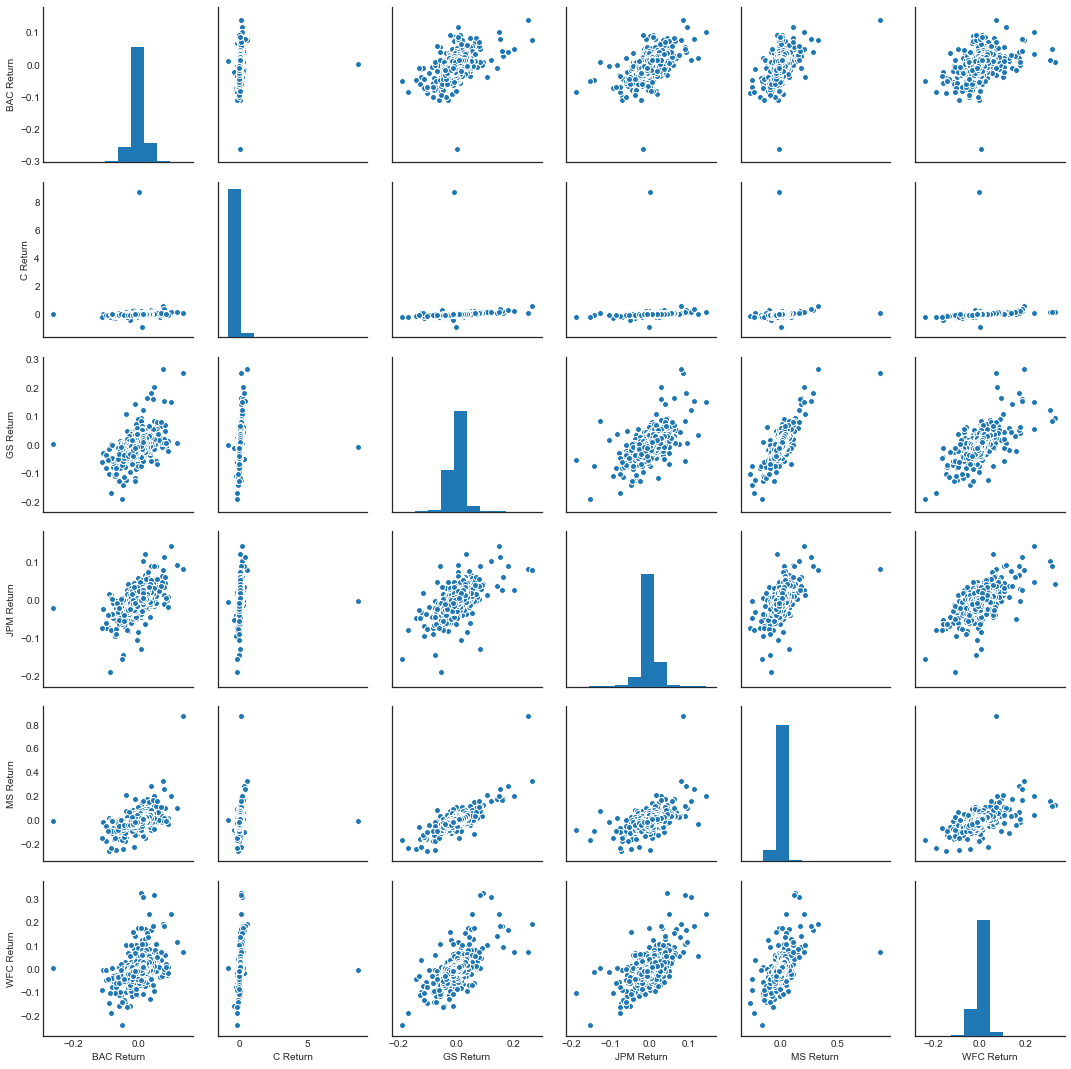

In [128]:
sns.pairplot(returns[1:])

All the stocks look reletively normal except for the case of City Group. City group shows a wierd straight line due to a huge stock crash.

** Finding dates each bank stock had the best and worst single day returns.**

In [147]:
returns.idxmax()

BAC Return   2008-10-13
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-03-23
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [148]:
returns.idxmin()

BAC Return   2014-11-03
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-03-02
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

Two of the banks share the same day for the worst drop, 2009-01-20. It was Barack Obama’s Inaugural day.**

Further Citigroup's largest drop and biggest gain were very close to one another. It was the time Citigroup was announcing Reverse Stock Split.

** Calculating standard deviation of the returns. Riskiest returns will have higher standard deviations.**

In [151]:
returns.std()

BAC Return    0.021736
C Return      0.179969
GS Return     0.025346
JPM Return    0.018811
MS Return     0.037820
WFC Return    0.030233
dtype: float64

City Group is having the highest standrad deviation. So that it is the riskiest.

In [158]:
returns.ix['2015-01-01':'2015-12-31'].std()

BAC Return    0.014181
C Return      0.015289
GS Return     0.014046
JPM Return    0.013226
MS Return     0.016249
WFC Return    0.012591
dtype: float64

All have similar risk situations in 2015. 

** Creating a distplot of the 2015 returns for Morgan Stanley **

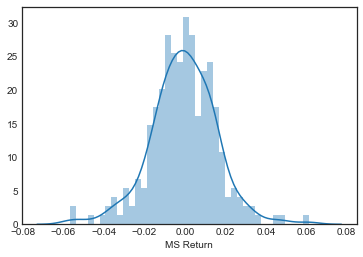

In [170]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],kde=True,bins=40)

** Creating a distplot of the 2008 returns for CitiGroup **

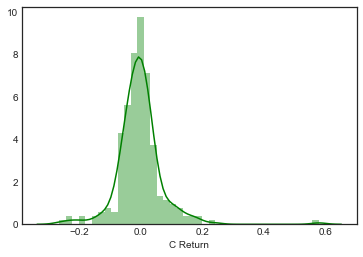

In [176]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],kde=True,color='green',bins=40)

** Creating a line plot showing Close price for each bank for the entire index of time.**

In [183]:
stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Analyzing the moving averages for these stocks in the year 2008. 

** Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

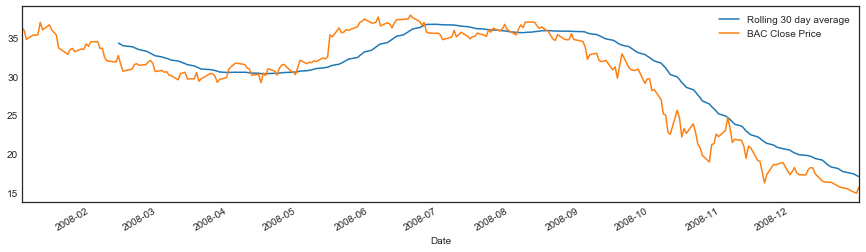

In [224]:
plt.figure(figsize=(15,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='Rolling 30 day average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close Price')
plt.legend()

** Creating a heatmap of the correlation between the stocks Close Price.**

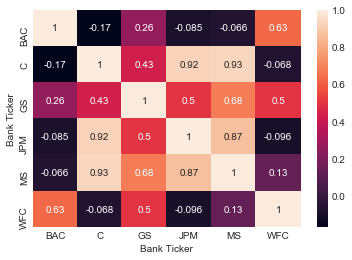

In [231]:
sns.heatmap(stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Clustering the correlations together.**

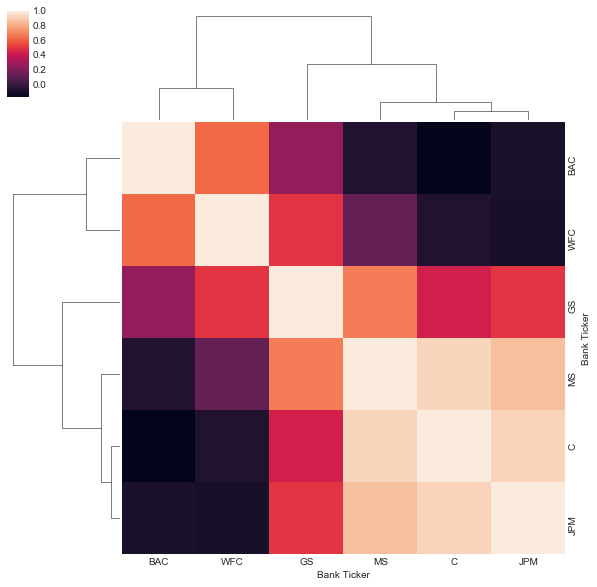

In [234]:
sns.clustermap(stocks.xs(key='Close',axis=1,level='Stock Info').corr())

** Creating a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [314]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=13,title='Simple Moving Averages Morgan Stanley 2015')


**Creating a Bollinger Band Plot for Bank of America for the year 2015.**

In [291]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll',title='Bank Of America 2015')

# End of Analysis